# 垃圾邮件文本分类
----
使用tensorflow 重新进行文本分类，最终在测试集上的损失率降低至0.17 准确率达到0.95以上。

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
def load_data(file_path):
    data=[]
    label=[]
    with open(file_path,"r") as data_file:
        raw_data=data_file.readlines()
        for raw_line in raw_data:
            sample=raw_line[:-1]
            sample=sample.split(",")
            label.append(sample[-1])
            sample=np.array([float(feature) for feature in sample[:-1]])
            sample[-3]/=10
            sample[-2]/=100
            sample[-1]/=1000
            data.append(sample)
    return np.array(data),np.array(label)
train_data,train_label=load_data("./spambase_train.data")
test_data,test_label=load_data("./spambase_test.data")

In [3]:
len(train_data)

3224

In [4]:
train_data[10]

array([0.    , 0.42  , 0.42  , 0.    , 1.27  , 0.    , 0.42  , 0.    ,
       0.    , 1.27  , 0.    , 0.    , 0.    , 0.    , 0.    , 1.27  ,
       0.    , 0.    , 1.7   , 0.42  , 1.27  , 0.    , 0.    , 0.42  ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 1.27  , 0.    , 0.    , 0.42  ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.063 , 0.    , 0.572 , 0.063 , 0.    , 0.5659, 0.55  ,
       0.249 ])

使用tensorflow 构建一个不含隐层两层的网络。 激活函数选择sigmoid。

In [5]:
from tensorflow.keras import layers
model = tf.keras.Sequential([
layers.Dense(57, activation='softmax'),
layers.Dense(1, activation='sigmoid')])

In [6]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [7]:
history = model.fit(train_data,
                    train_label,
                    epochs=40,
                    batch_size=20,
                    validation_data=(test_data, test_label),
                    verbose=1)

Train on 3224 samples, validate on 1377 samples
Epoch 1/40
3224/3224 [==============================] - 0s 111us/step - loss: 0.6583 - acc: 0.6635 - val_loss: 0.6185 - val_acc: 0.7705
Epoch 2/40
3224/3224 [==============================] - 0s 38us/step - loss: 0.5813 - acc: 0.8362 - val_loss: 0.5293 - val_acc: 0.8998
Epoch 3/40
3224/3224 [==============================] - 0s 38us/step - loss: 0.4996 - acc: 0.8958 - val_loss: 0.4525 - val_acc: 0.9136
Epoch 4/40
3224/3224 [==============================] - 0s 38us/step - loss: 0.4345 - acc: 0.9110 - val_loss: 0.3935 - val_acc: 0.9230
Epoch 5/40
3224/3224 [==============================] - 0s 38us/step - loss: 0.3848 - acc: 0.9184 - val_loss: 0.3492 - val_acc: 0.9310
Epoch 6/40
3224/3224 [==============================] - 0s 39us/step - loss: 0.3480 - acc: 0.9212 - val_loss: 0.3166 - val_acc: 0.9368
Epoch 7/40
3224/3224 [==============================] - 0s 39us/step - loss: 0.3206 - acc: 0.9265 - val_loss: 0.2924 - val_acc: 0.9339
Epoch 

In [8]:
history_dict = history.history
history_dict.keys()
dict_keys=['loss', 'val_loss', 'val_acc', 'acc']

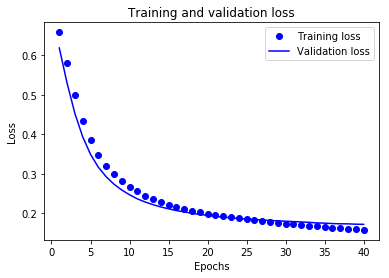

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

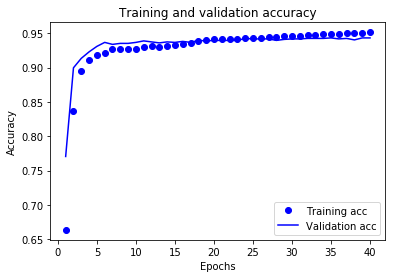

In [10]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [13]:
predictions = model.predict(train_data)

In [26]:
def load_prediction_data(file_path):
    data=[]
    with open(file_path,"r") as data_file:
        raw_data=data_file.readlines()
        for raw_line in raw_data:
            sample=raw_line[:-1]
            sample=sample.split(",")
            sample=np.array([float(feature) for feature in sample])
            sample[-3]/=10
            sample[-2]/=100
            sample[-1]/=1000
            data.append(sample)
    return np.array(data)
prediction_data=load_prediction_data(".\get_the_flag.data")

In [27]:
predictions = model.predict(prediction_data)

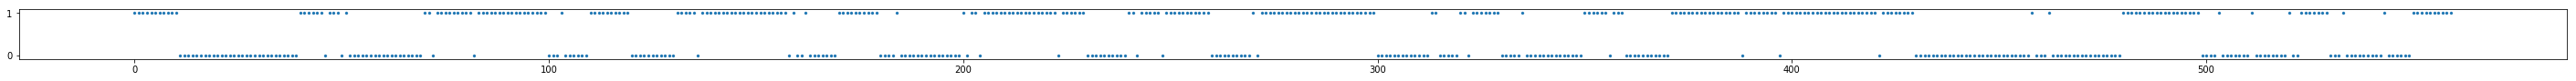

In [32]:
data_show=[]
for i in predictions:
    if i[0]<0.5:
        data_show.append(0)
    else:
        data_show.append(1)
plt.rcParams['figure.figsize'] = (50.0, 1.0) 
plt.scatter(range(len(data_show)),data_show,linewidth=0.1,s=10)
plt.show()